# Problem 18

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

training_set = pd.read_csv('./npf_train.csv')
del training_set['id']
del training_set['partlybad']
del training_set['date']
y = training_set['class4'].astype('category')

training_set = training_set[[c for c in training_set if 'mean' in c]].rename(columns= lambda x: x.replace('.mean', 'mean'))

training_set = pd.concat([training_set, y], axis=1)
colss = training_set.columns.difference(['class4'])
scaled = preprocessing.scale(training_set[training_set.columns.difference(['class4'])])
# scaled = pd.concat([pd.DataFrame(scaled, columns=colss), y], axis=1)
#training_set = pd.concat([pd.DataFrame(scaled, columns=colss), y], axis=1)

In [2]:
training_set['class4'] = training_set['class4'].cat.codes

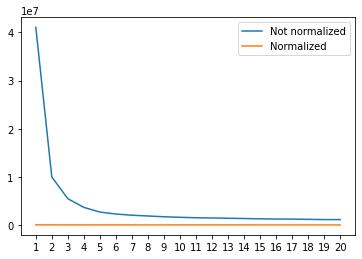

In [3]:
# task a
from sklearn.cluster import KMeans
toplotY_un = []
toplotX_un = []
toplotX_sc = []
toplotY_sc = []
for i in range(1, 21):
    km = KMeans(n_clusters=i).fit(training_set[training_set.columns.difference(['class4'])])
    toplotY_un.append(-1*km.score(training_set[training_set.columns.difference(['class4'])]))
    toplotX_un.append(str(i))

    km = KMeans(n_clusters=i).fit(scaled)
    toplotY_sc.append(-1*km.score(scaled))
    toplotX_sc.append(str(i))

plt.plot(toplotX_un, toplotY_un, label='Not normalized')
plt.plot(toplotX_sc, toplotY_sc, label='Normalized')
plt.legend()
plt.show()
# not appreciable bc unscaled is HUGE

In [4]:
toplotY_sc

[22899.999999999993,
 15869.168844721906,
 13147.730831928027,
 10845.54542406677,
 9721.85276196181,
 9114.481702253473,
 8710.037463131892,
 8267.927506498807,
 7896.641887813164,
 7608.535772259967,
 7329.800582322089,
 7044.47080452127,
 6792.264272305343,
 6661.316485423587,
 6434.96222248738,
 6229.296165524172,
 6154.216707369852,
 6080.210374598219,
 5832.040716217323,
 5701.86207865343]

<AxesSubplot:>

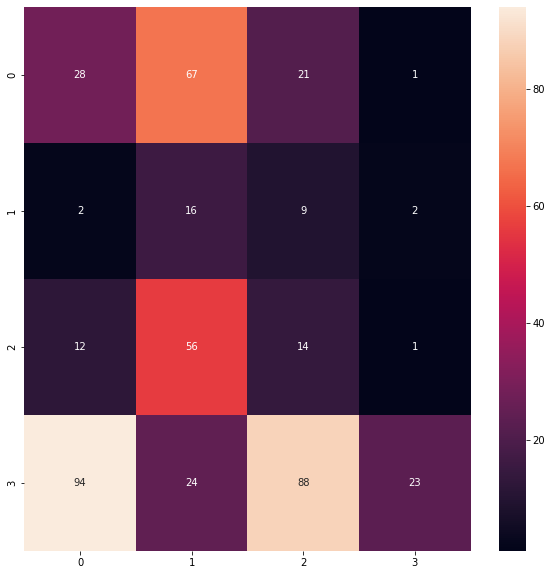

In [29]:
# task b
from sklearn.metrics import confusion_matrix
import seaborn as sns

km = KMeans(n_clusters=4).fit(scaled)
y_pred = km.predict(scaled)
y_true = training_set['class4']

cm = confusion_matrix(y_true, y_pred)

# plt.matshow(cm)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)

<AxesSubplot:>

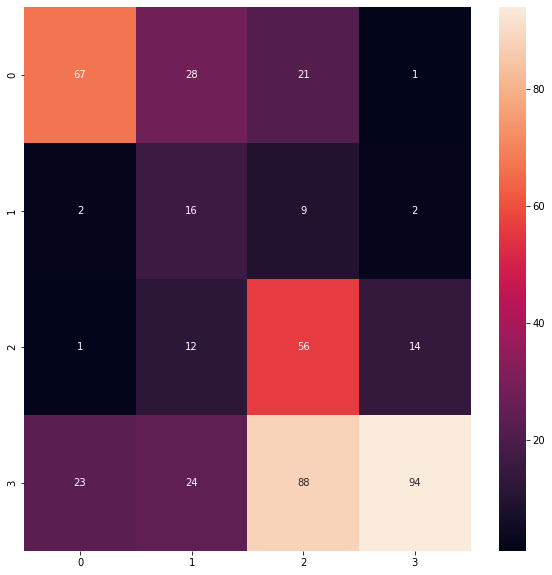

In [32]:
# spaghetti but ok
new_cm = [[67, 28, 21, 1], [2,16,9,2], [1,12,56,14], [23,24,88,94]]
plt.figure(figsize=(10,10))
sns.heatmap(new_cm, annot=True)

In [ ]:
# task c
import sys

toplotX = []
toplotY = []
min = float('inf')
max = 0

for i in range(1, 1001):
    km = KMeans(n_clusters=4, init='random').fit(scaled)
    l = -1*km.score(scaled)
    toplotY.append(l)
    toplotX.append(i)
    if l < min:
        min = l
    if l > max:
        max = l
    print(i)
    sys.stdout.flush()

10845.407939650557 10878.13091095091


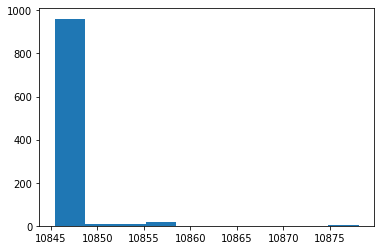

In [39]:
plt.hist(toplotY)
print(min, max)

In [16]:
# task d
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1 
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    dendrogram(linkage_matrix, **kwargs)


agg_complete = AgglomerativeClustering(linkage='complete', compute_distances=True).fit(scaled)
agg_single = AgglomerativeClustering(linkage='single', compute_distances=True).fit(scaled)

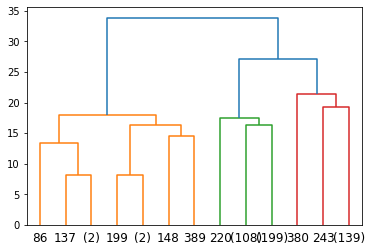

In [17]:
plot_dendrogram(agg_complete, truncate_mode="level", p=3)

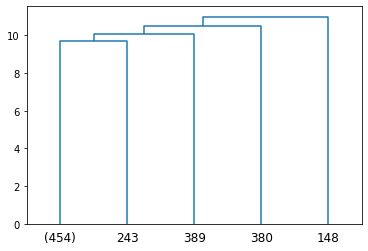

In [18]:
plot_dendrogram(agg_single, truncate_mode="level", p=3)